# Creating a Driven Control

This notebook illustrates how to use Q-CTRL Open Controls to create a driven control.

A driven control represents a continuous drive on a the transition of a qubit with a tunable detuning. The Open Controls package allows you to generate driven controls that enact dynamically corrected gates (DCG). These dynamically corrected gates are able to achieve an arbitrary rotation of the bloch sphere (around any point on the equator), in a manner that is robust to dephasing and/or control noise. DCGs can be used as drop-in gate replacements to suppress errors in a quantum computation.

Q-CTRL Open Controls can be used to create a driven control from a library of well-known control schemes. Once created, it can be printed, plotted, exported in CSV or JSON format for use on a quantum computer or any of [Q-CTRL's products](https://q-ctrl.com/products/).

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qctrlopencontrols import new_predefined_driven_control, DrivenControl

## Predefined Driven Control Schemes

Q-CTRL Open Controls can create driven controls according to the following dynamically corrected gate protocols:

1. `primitive`
2. `BB1`
3. `SK1`
4. `CORPSE`
5. `WAMF1`
6. `SCROFULOUS`
7. `COPRSE in BB1`
8. `CORPSE in SK1`
9. `CORPSE in SCROFULOUS`

See the [technical documentation](https://docs.q-ctrl.com/control-library) for details.

## Creating and Printing a Driven Control

A driven control is made of a continuous drive on the qubits transition with a tunable detuning. The continuous drive is described by a piecewise constant function made of a set of segments. Each drive segment has a `rabi_rate` applied at a `azimuthal_angle` for a `duration`, with a `detuning`. The mathematical definition of a driven control is explained in the [technical documentation](http://docs.q-ctrl.com/control-library#dynamical-decoupling-sequences).

Q-CTRL Open controls can generate a driven control from a library of dynamically corrected gate schemes, mathematically defined in the [technical documentation](https://docs.q-ctrl.com/control-formats#dynamical-decoupling-sequences). All dynamically corrected gates are derived from three quantities: 

* `maximum_rabi_rate` the maximum achievable rabi rate.
* `rabi_rotation` the total rotation of the bloch sphere.
* `azimuthal_angle` the angle to the center point of the rotation on the equator. 

In [3]:
## Primitive Pi pulse in X
prim = new_predefined_driven_control(
    rabi_rotation=np.pi,
    azimuthal_angle=0,
    maximum_rabi_rate=2 * np.pi,
    scheme='primitive',
    name='Primitive X-pi'
)
print(prim)

Primitive X-pi:
Rabi Rates = [1.0] x 6.283185307179586
Azimuthal Angles = [0.0] x pi
Detunings = [0] x 0.0
Durations = [1.0] x 0.5


In [4]:
## BB1 Pi pulse in X (implements the same effective operation as above)
bb1_x = new_predefined_driven_control(
    rabi_rotation=np.pi,
    azimuthal_angle=0,
    maximum_rabi_rate=2 * np.pi,
    scheme='BB1',
    name='BB1 X-pi'
)
print(bb1_x)

BB1 X-pi:
Rabi Rates = [1.0,1.0,1.0,1.0] x 6.283185307179586
Azimuthal Angles = [0.0,0.5804306232551663,1.7412918697654987,0.5804306232551663] x pi
Detunings = [0,0,0,0] x 0.0
Durations = [0.2,0.2,0.4,0.2] x 2.5


In [5]:
## BB1 Pi/2 pulse in Y
bb1_y = new_predefined_driven_control(
    rabi_rotation=np.pi/2,
    azimuthal_angle=np.pi/2,
    maximum_rabi_rate=2 * np.pi,
    scheme='BB1',
    name='BB1 Y-pi/2'
)
print(bb1_y)

BB1 Y-pi/2:
Rabi Rates = [1.0,1.0,1.0,1.0] x 6.283185307179586
Azimuthal Angles = [0.5,1.0398930876747683,2.1196792630243046,1.0398930876747683] x pi
Detunings = [0,0,0,0] x 0.0
Durations = [0.1111111111111111,0.2222222222222222,0.4444444444444444,0.2222222222222222] x 2.25


In [6]:
## SK1 Pi/2 pulse in Y
sk1 = new_predefined_driven_control(
    rabi_rotation=np.pi/2,
    azimuthal_angle=np.pi/2,
    maximum_rabi_rate=2 * np.pi,
    scheme='SK1',
    name='SK1 Y-pi/2'
)
print(sk1)

SK1 Y-pi/2:
Rabi Rates = [1.0,1.0,1.0] x 6.283185307179586
Azimuthal Angles = [0.5,-0.03989308767476825,1.0398930876747683] x pi
Detunings = [0,0,0] x 0.0
Durations = [0.1111111111111111,0.4444444444444444,0.4444444444444444] x 2.25


In [7]:
## CORPSE Pi/2 pulse in X
corpse = new_predefined_driven_control(
    rabi_rotation=np.pi/2,
    azimuthal_angle=0,
    maximum_rabi_rate=2 * np.pi,
    scheme='CORPSE',
    name='CORPSE X-pi/2'
)
print(corpse)

CORPSE X-pi/2:
Rabi Rates = [1.0,1.0,1.0] x 6.283185307179586
Azimuthal Angles = [0.0,1.0,0.0] x pi
Detunings = [0,0,0] x 0.0
Durations = [0.5284727158825664,0.43811717424831853,0.033410109869114954] x 2.0199465438373845


### Plotting a driven control

Once created, Q-CTRL Open Controls provides the method `get_plot_formatted_arrays` to create a set of formatted arrays ready to be immediately plotted with Matplotlib. We use the `BB1` as a driven control to generate plots of the `rabi_rates`, `azimuthal_angles` and `detunings`.

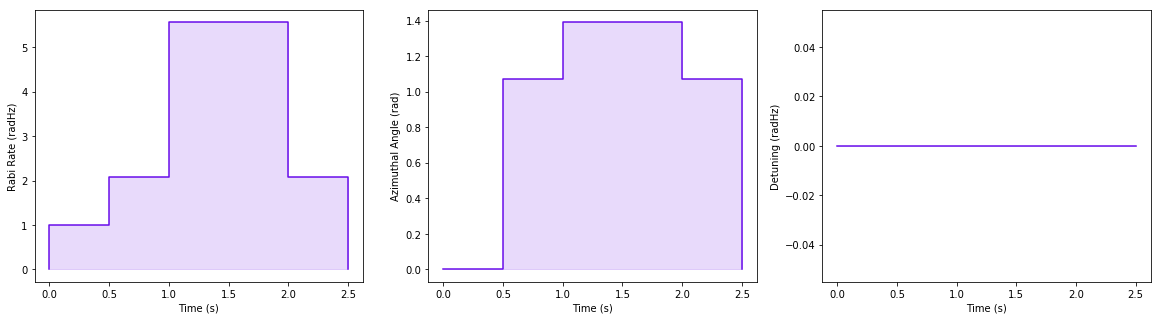

In [8]:
formatted_plot_data = bb1_x.get_plot_formatted_arrays(coordinates='cylindrical')
rabi_rates, azimuthal_angles, detunings, times = (formatted_plot_data['rabi_rates'],
                                                   formatted_plot_data['azimuthal_angles'],
                                                   formatted_plot_data['detunings'],
                                                   formatted_plot_data['times'])
# prepare the axes
figure, (x_axis, y_axis, z_axis) = plt.subplots(1, 3, figsize=(20,5))

x_axis.fill_between(times, rabi_rates, 0, alpha=0.15, color='#680cea')
x_axis.plot(times, rabi_rates, color='#680cea')
x_axis.set_xlabel('Time (s)')
x_axis.set_ylabel('Rabi Rate (radHz)')

y_axis.fill_between(times, azimuthal_angles, 0, alpha=0.15, color='#680cea')
y_axis.plot(times, azimuthal_angles, color='#680cea')
y_axis.set_xlabel('Time (s)')
y_axis.set_ylabel('Azimuthal Angle (rad)')

z_axis.fill_between(times, detunings, 0, alpha=0.15, color='#680cea')
z_axis.plot(times, detunings, color='#680cea')
z_axis.set_xlabel('Time (s)')
z_axis.set_ylabel('Detuning (radHz)')

plt.show()

### Exporting the Driven Control

Q-CTRL Open Controls enables exporting driven controls in CSV or JSON format. An exported driven control is [formatted](https://docs.q-ctrl.com/control-formats) to be compatible with [Q-CTRL BLACK OPAL](https://app.q-ctrl.com).

Q-CTRL Open Controls can export a driven control in either `cartesian` or `cylindrical` coordinates. For details, consult the [technical documentation](https://docs.q-ctrl.com/output-data-formats#q-ctrl-hardware).

In the example below, we chose the `bb1_x` control (created above) for exporting to a CSV file.

In [9]:
file_type='CSV'
filename='example_driven_control.csv'

bb1_x.export_to_file(
    filename=filename, 
    file_type=file_type,
    coordinates='cartesian')

In [10]:
## Reload the file and check its content to better understand the format
with open(filename, 'rt') as handle:
    file_content = handle.readlines()
for line in file_content:
    print(line)

amplitude_x,amplitude_y,detuning,duration,maximum_rabi_rate

6.283185307179586,0.0,0.0,0.5,6.283185307179586

-1.570796326794896,6.083668013960418,0.0,0.5,6.283185307179586

4.319689898685962,-4.562751010470316,0.0,1.0,6.283185307179586

-1.570796326794896,6.083668013960418,0.0,0.5,6.283185307179586


### Opening the Exported Sequence in Q-CTRL BLACK OPAL

The exported CSV files are compatible for analysis by a suite of tools offered by [Q-CTRL BLACK OPAL](https://app.q-ctrl.com). For example, you can upload the exported file in the [1-QUBIT Workspace](https://app.q-ctrl.com/oneQubit) for further analysis. The process to upload a custom control is described in [Uploading and Evaluating Custom Controls](https://help.q-ctrl.com/black-opal/guides/uploading-and-evaluating-custom-controls). For a full capability of BLACK OPAL, consult [Q-CTRL Help](https://help.q-ctrl.com/black-opal)

## Custom Definition of a Driven Control

An arbitrary `DrivenControl` can be defined defined using arrays of `rabi_rotations`, `azimuthal_angles`, `detuning_rotations` and `durations`.

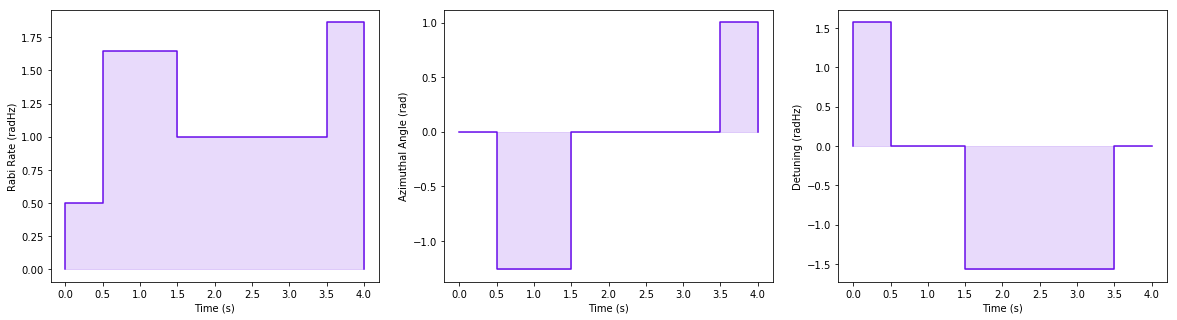

In [11]:
_rabi_rates = [np.pi/2,np.pi/2,np.pi,np.pi]
_azimuthal_angles = [0., -np.pi/2, 0., np.pi/2]
_detunings = [np.pi/2, 0, -np.pi/2, 0]
_durations = [0.5, 1, 2, 0.5]
_name = 'Custon Driven Control'

custom_driven_control = DrivenControl(rabi_rates=_rabi_rates, 
                                      azimuthal_angles=_azimuthal_angles,
                                      detunings=_detunings,
                                      durations=_durations,
                                      name=_name)

## let us plot and verify
formatted_plot_data = custom_driven_control.get_plot_formatted_arrays(coordinates='cylindrical')
rabi_rates, azimuthal_angles, detunings, times = (formatted_plot_data['rabi_rates'],
                                                   formatted_plot_data['azimuthal_angles'],
                                                   formatted_plot_data['detunings'],
                                                   formatted_plot_data['times'])

figure, (x_axis, y_axis, z_axis) = plt.subplots(1, 3, figsize=(20,5))

x_axis.fill_between(times, rabi_rates, 0, alpha=0.15, color='#680cea')
x_axis.plot(times, rabi_rates, color='#680cea')
x_axis.set_xlabel('Time (s)')
x_axis.set_ylabel('Rabi Rate (radHz)')

y_axis.fill_between(times, azimuthal_angles, 0, alpha=0.15, color='#680cea')
y_axis.plot(times, azimuthal_angles, color='#680cea')
y_axis.set_xlabel('Time (s)')
y_axis.set_ylabel('Azimuthal Angle (rad)')

z_axis.fill_between(times, detunings, 0, alpha=0.15, color='#680cea')
z_axis.plot(times, detunings, color='#680cea')
z_axis.set_xlabel('Time (s)')
z_axis.set_ylabel('Detuning (radHz)')

plt.show()